### Reinforcement Learning - Resource Manager

Version 1.3:

- Implement Water Depletion
    - idea: lose water as resource when moving
    - still get reward around water
    - done if water resource is 0
    - when half of the water resources are used, spawn initial number of resources again
- New render mode    



### Imports

In [1]:
import gym
from gym import spaces
import numpy as np
import pygame
from gym.envs.registration import register
import matplotlib.pyplot as plt

### Environment

In [2]:
from ResourceManagerEnvironment_v1_3 import ResourceManagerEnv
from MonteCarloTreeSearch import Node, MonteCarloTreeSearch

In [3]:
register(
    id='Resource-Manager-v1-3',
    entry_point='ResourceManagerEnvironment_v1_3:ResourceManagerEnv',
    kwargs={
        'grid_size': 20,           #set to desired grid size
        'window_size': 300,        #set to desired window size
        'num_water_resources': 10,  #set to desired number of water resources
        'render_mode': 'human'     #set to desired render mode ('human' or 'rgb_array')
    },
    max_episode_steps=500,
)


In [4]:
env = gym.make('Resource-Manager-v1-3')
num_episodes = 5

#lists to store rewards and water resources
episode_rewards = []
episode_water_resources = []

#run episodes
for episode in range(num_episodes):
    observation = env.reset()
    total_reward = 0
    total_water_resource = env.water_resource

    while True:
        #using random action selection for now
        action = env.action_space.sample()
        #take a step in the environment
        observation, reward, done, truncated, info = env.step(action)


        #accumulate the total reward for the episode
        total_reward += reward
        
        #check if the agent picked up water resources in the current step
        if env.water_resource > total_water_resource:
            total_water_resource = env.water_resource

        # Optionally, render the environment
        env.render()

        if done:
            break

    # Append episode results to lists
    episode_rewards.append(total_reward)
    episode_water_resources.append(total_water_resource)

    print(f"Episode {episode + 1}, Total Reward: {total_reward}, Total Water Resource: {total_water_resource}")


c:\Users\denni\.conda\envs\tf\lib\site-packages\gym\utils\passive_env_checker.py:31: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vector or use a custom policy to properly process the data. Actual observation shape: (20, 20)
  logger.warn(
c:\Users\denni\.conda\envs\tf\lib\site-packages\gym\utils\passive_env_checker.py:187: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `options` to allow the environment initialisation to be passed additional information.
  logger.warn(
c:\Users\denni\.conda\envs\tf\lib\site-packages\gym\utils\passive_env_checker.py:165: UserWarning: WARN: The obs returned by the `reset()` method is not within the observation space.
  logger.warn(f"{pre} is not within the observation space.")
c:\Users\denni\.conda\envs\tf\lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a de

Episode 1, Total Reward: -172, Total Water Resource: 100
Episode 2, Total Reward: -206, Total Water Resource: 100
Episode 3, Total Reward: -201, Total Water Resource: 100
Episode 4, Total Reward: -204, Total Water Resource: 100
Episode 5, Total Reward: -209, Total Water Resource: 100


## Monte Carlo Tree Search

Definitionen:

Iterations:
Anzahl, wie oft die Simulation durchlaufen werden soll

Simulation Steps:
Anzahl, wie oft der Algorithmus gemacht werden soll

Episoden:
Anzahl, wie oft der komplette Suchalgorithmus mit MCTS gemacht werden soll

In [5]:
env = gym.make('Resource-Manager-v1-3')
num_episodes = 5
mcts = MonteCarloTreeSearch(env, iterations=1000, simulation_steps=50)
total_rewards = []

for episode in range(num_episodes):
    #reset the environment for a new episode
    state = env.reset()

    #initialize the root node with the current state
    root = Node(state=state)

    while True:
        #perform the search and get the best action
        best_action = mcts.search()
        #perform the selected action in the environment
        new_state, reward, done, truncated, info = env.step(best_action)
        #update the root node with the new state
        #root = next(child for child in root.children if child.action == best_action)
        total_rewards.append(info['total_reward'])
        #env.render()
        if done:
            break

    print(f"Episode {episode + 1}, Total Reward: {info['total_reward']}")

    


KeyboardInterrupt: 

## Evaluation

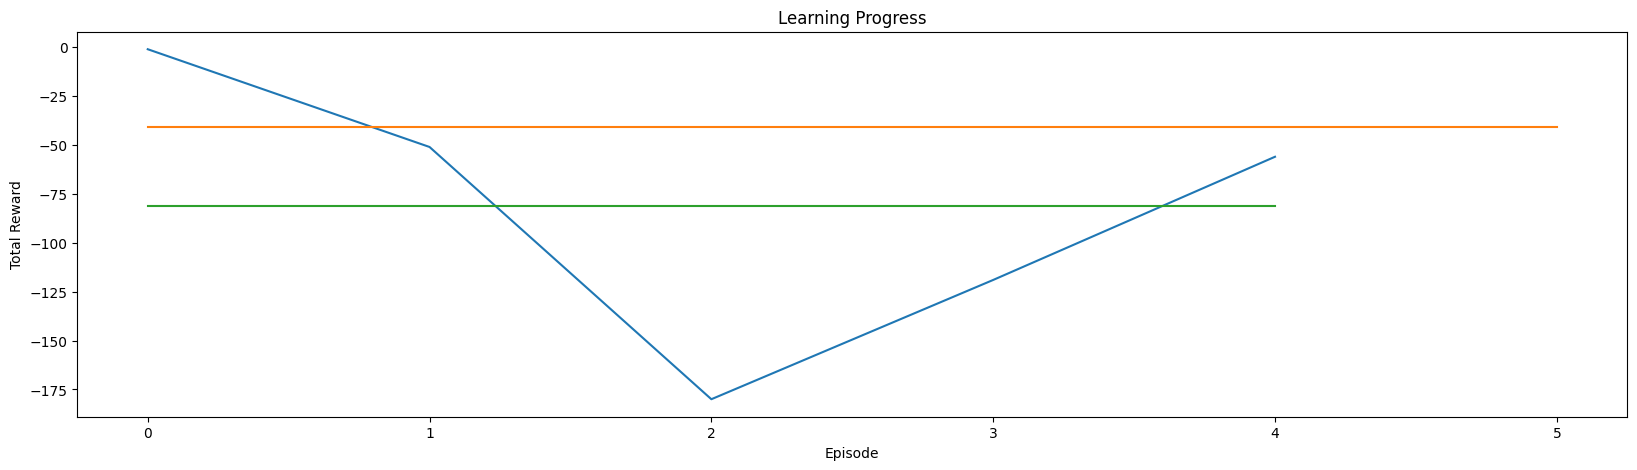

In [5]:
#Plot the total rewards
plt.figure(figsize=(20,5))
plt.plot(total_rewards)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Learning Progress')
#plot tendency curve
plt.plot(np.convolve(total_rewards, np.ones((10,))/10, mode='valid'))
#plot average
plt.plot(np.ones(len(total_rewards))*np.mean(total_rewards))
plt.show()


In [10]:
#total number where reward is smaller or equal to -200
print("Number of episodes with reward <= -200: ", len([i for i in total_rewards if i <= -200]))

Number of episodes with reward <= -200:  0
